# TP5 - Support Vector Machine : Reconnaitre des nombres

On cherche à reproduire une partie du papier qui présente les [SVM](https://dl.acm.org/doi/pdf/10.1145/130385.130401). Nous allons cependant le faire avec les données MNIST qui consiste en image de chiffre manuscrit.

Commençons par importer les données : elles sont au format d'image de taille 28x28, nous allons les transformer en un vecteur de $28\times28=784$ dimensions.

In [1]:
import numpy as np
import pandas as pd
from tensorflow import keras

(X_train, class_train), (X_test, class_test) = keras.datasets.mnist.load_data()
X_train = pd.DataFrame(X_train.reshape((X_train.shape[0], -1)), columns=["Pix. %d" % number for number in range(1, 785)])
X_test = pd.DataFrame(X_test.reshape((X_test.shape[0], -1)), columns=["Pix. %d" % number for number in range(1, 785)])
X_train.head()

,Pix. 1,Pix. 2,Pix. 3,Pix. 4,Pix. 5,Pix. 6,Pix. 7,Pix. 8,Pix. 9,Pix. 10,...,Pix. 775,Pix. 776,Pix. 777,Pix. 778,Pix. 779,Pix. 780,Pix. 781,Pix. 782,Pix. 783,Pix. 784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


**Consigne** : Créer une fonction `vector_to_image` qui prend en paramètre un vecteur *vector* de taille 784 et qui renvoie une matrice de taille $28\times28$.

In [2]:
def vector_to_image(vector):
    image = np.array(vector).reshape((28, 28))
    return image

**Consigne** : Exploiter la fonction précédente et la fonction [`imshow`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imshow.html) pour visualiser l'image associé à la première ligne de *X_train*.

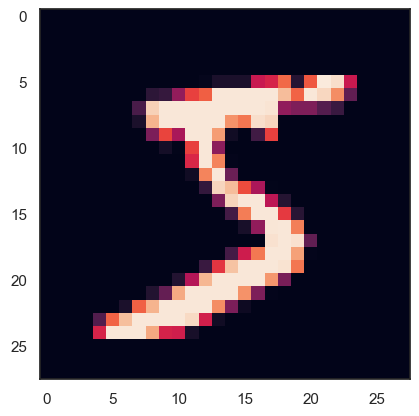

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(style="white")

vector = X_train.iloc[0, ]
plt.imshow(vector_to_image(X_train.iloc[0, ]))
plt.show()

**Consigne** : En exploitant la fonction [`randint`](https://docs.python.org/3/library/random.html), sélectionner aléatoirement 8 images que l'on affichera ensemble.

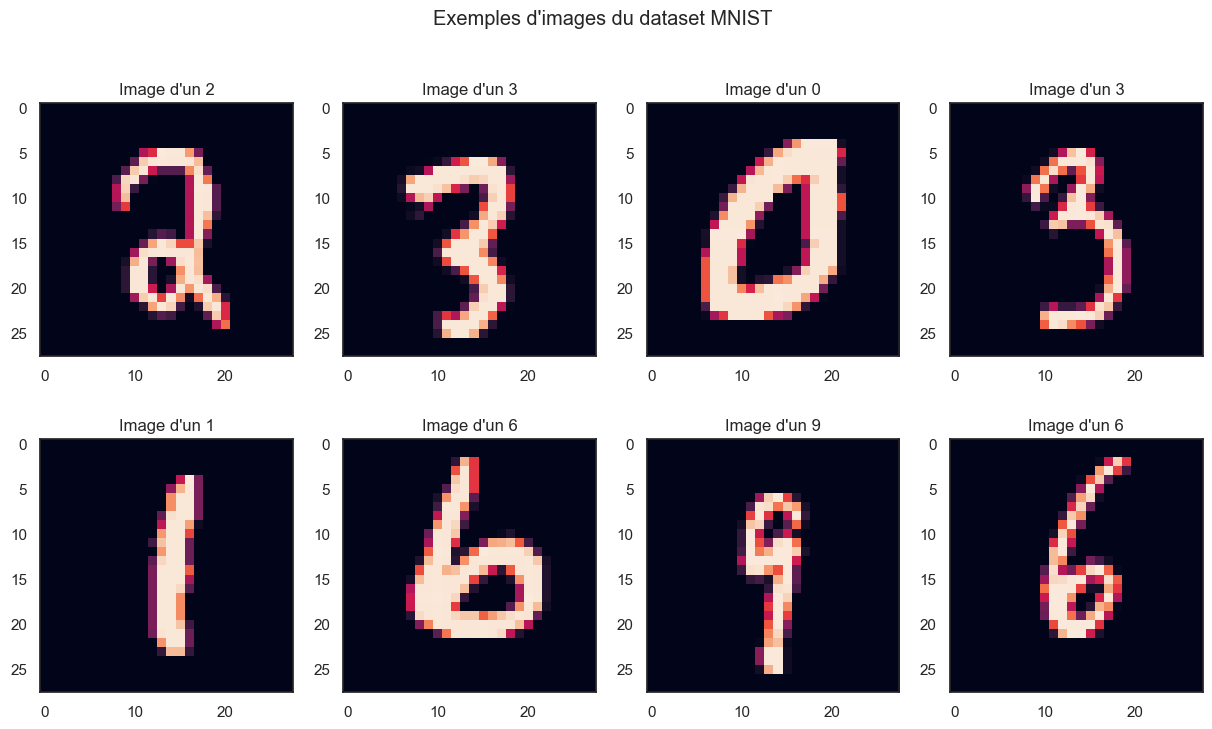

In [4]:
from random import randint

plt.figure(figsize=(15, 8))

for plot_index in range(8):
    plt.subplot(2, 4, plot_index+1)
    index = randint(0, X_train.shape[0])
    vector = X_train.iloc[index, ]
    label = class_train[index]
    plt.imshow(vector_to_image(vector))
    plt.title(f"Image d'un {label}")

plt.suptitle("Exemples d'images du dataset MNIST")
plt.show()

**Consigne** : Quelle est la valeur maximale du dataset ? Minimale ?

In [5]:
maximal = np.max(np.max(X_train))
minimal = np.min(np.min(X_train))
print(f"Valeur minimale: {minimal}")
print(f"Valeur maximale: {maximal}")

Valeur minimale: 0
Valeur maximale: 255


Jusqu'ici, nous n'avons travaillé qu'avec des classifications binaire. Ici, il y a 10 classes. A-t-on une bonne représentativité des classes ?

In [6]:
100 * pd.Series(class_train).value_counts().sort_index() / X_train.shape[0]

0     9.871667
1    11.236667
2     9.930000
3    10.218333
4     9.736667
5     9.035000
6     9.863333
7    10.441667
8     9.751667
9     9.915000
Name: count, dtype: float64

**Consigne** : En utilisant la classe [`StandardScaler`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html), standardiser le jeu d'entraînement et le jeu de test.

In [7]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Prédiction de la classe 0

Nous allons prédire la classe 0 uniquement pour commencer.

**Consigne** : Construire les vecteurs *y_train* et *y_test* pour répondre à ce besoin.

In [8]:
y_train = (class_train == 0).astype(np.uint8)
y_test = (class_test == 0).astype(np.uint8)

**Consigne** : Entraîner un modèle [SVM](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC), puis mesurer ses performances à l'aide du f1-score.

In [9]:
from sklearn.svm import SVC
from sklearn.metrics import f1_score

model_SVM = SVC().fit(X_train, y_train)
y_pred = model_SVM.predict(X_test)
performance = f1_score(y_test, y_pred)
print(f"Performance SVM: {performance:.4f}")

Performance SVM: 0.9836


**Consigne** : Comparer les performances avec un [XGBoost](https://xgboost.readthedocs.io/en/stable/python/python_api.html) sans chercher les meilleurs paramètres.

In [10]:
from xgboost import XGBClassifier

model_XGB = XGBClassifier().fit(X_train, y_train)
y_pred = model_XGB.predict(X_test)
performance = f1_score(y_test, y_pred)
print(f"Performance XGBoost: {performance:.4f}")

Performance XGBoost: 0.9872


Chaque modèle SVM repose sur des vecteurs supports. L'attribut *support_* d'un modèle SVM, indique les index de ces vecteurs.

**Consigne** : Après avoir afficher le nombre de vecteurs supports nécessaire pour former le modèle, sélectionner aléatoirement 8 vecteurs support que l'on affichera ensemble.

In [11]:
n_supports = len(model_SVM.support_)

print(f"Il y a {n_supports} vecteurs support pour ce modèle.")

Il y a 2793 vecteurs support pour ce modèle.


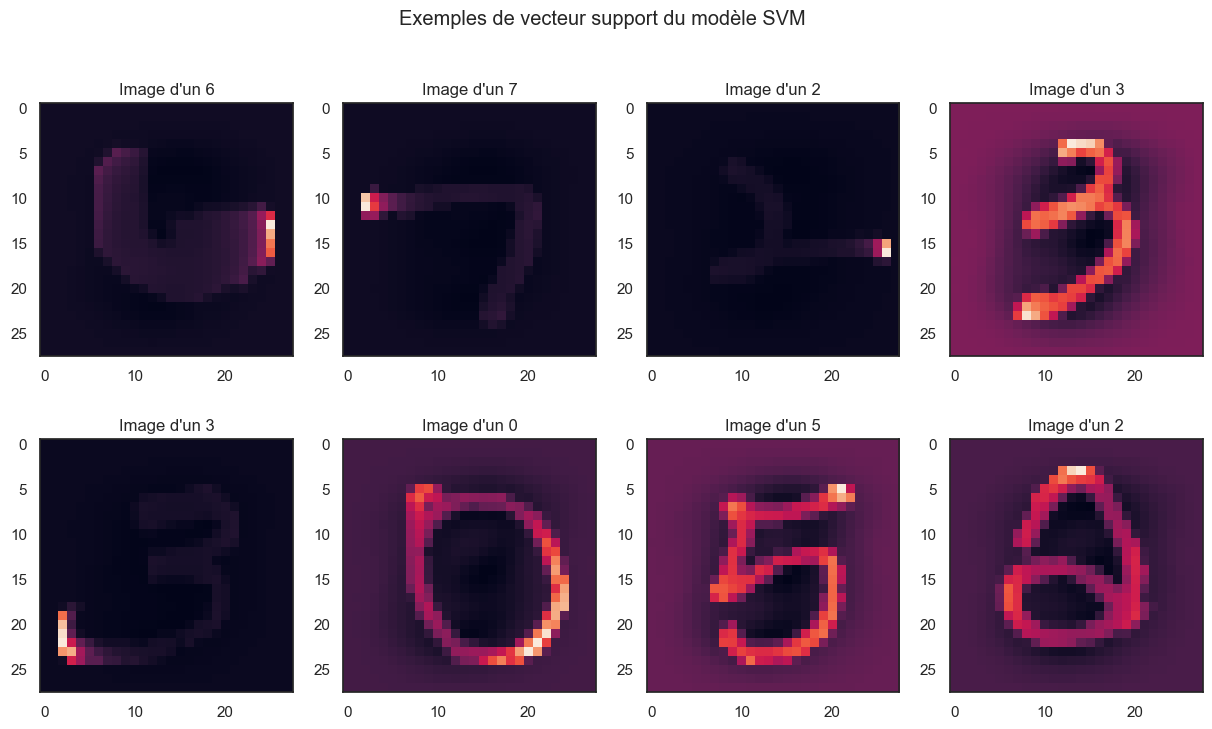

In [12]:
plt.figure(figsize=(15, 8))


for plot_index in range(8):
    plt.subplot(2, 4, plot_index+1)
    index = model_SVM.support_[randint(0, n_supports)]
    vector = X_train[index, ]
    label = class_train[index]
    plt.imshow(vector_to_image(vector))
    plt.title(f"Image d'un {label}")

plt.suptitle("Exemples de vecteur support du modèle SVM")
plt.show()

On souhaite tester toutes les fonctionnalités du SVM : différents noyaux et différentes pénalisations.

**Consigne** : En utilisant la classe [`GridSearch`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) tester quelques noyaux et pénalisations et trouver le meilleur paramétrage.

**Discussion** : Puisque l'entraînement d'un SVM est long, et que l'on va réaliser un GridSearch avec cross-validation, on va entraîner beaucoup de modèle. Donc on ne vas s'intéresser qu'à peu de possibilités.

In [13]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'kernel': ['rbf', 'sigmoid'],
    'C': [0.1, 10]
}

grid_search = GridSearchCV(SVC(), param_grid, scoring='f1', cv=3)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_performance = grid_search.best_score_
print(f"Best parameters: {best_params}\nBest performance: {best_performance:.4f}")



Best parameters: {'C': 10, 'kernel': 'rbf'}
Best performance: 0.9836


## Prédiction d'un nombre

Nous avons montré comment apprendre la classe 0, on souhaite le faire pour toute.

**Consigne** : Créer une fonction `learn_class` qui prendra en paramètre un nombre *class_value* qui correspond à la classe que l'on cherche à prédire. Cette fonction renverra un modèle SVM entraîné pour reconnaître la classe *class_value*. On affichera également la performance du modèle sur le jeu de test.

In [14]:
def learn_class(class_value):
    y_train = (class_train == class_value).astype(np.uint8)
    y_test = (class_test == class_value).astype(np.uint8)
    model = SVC().fit(X_train, y_train)
    y_pred = model.predict(X_test)
    performance = f1_score(y_test, y_pred)
    print(f"Classe {class_value}: f1_score={performance:.4f}")
    return model

**Consigne** : A l'aide de la fonction précédente, entraîner des SVM pour prédire chaque chiffre, tous les stocker dans la liste *models*

In [15]:
models = []
for class_value in range(10):
    model = learn_class(class_value)
    models.append(model)

Classe 0: f1_score=0.9836
Classe 1: f1_score=0.9894
Classe 2: f1_score=0.9547
Classe 3: f1_score=0.9615
Classe 4: f1_score=0.9622
Classe 5: f1_score=0.9544
Classe 6: f1_score=0.9702
Classe 7: f1_score=0.9478
Classe 8: f1_score=0.9450
Classe 9: f1_score=0.9366


On souhaite à présent exploiter ces dix modèles pour prédire le chiffre dans une image.

**Consigne** : Définir une fonction `make_prediction` qui prendra en paramètre *vector* qui correspond à une image. Elle testera la prédiction pour chaque modèle et renverra la classe prédite.

In [16]:
def make_prediction(vector):
    predictions = []
    for model in models:
        y_pred = model.predict(np.array(vector).reshape(1, -1))
        predictions.append(y_pred)
    return np.argmax(predictions)

**Consigne** : Tester cette fonction sur plusieurs exemples.